# <font color = 'dodgerblue'>**Introduction to Python**
Python is a versatile language used in various fields like web development, data analysis, machine learning, and more. In this brief crash course, we'll explore some of the fundamental concepts of Python.


## <font color = 'dodgerblue'>**Basic Data Types**
### <font color = 'dodgerblue'>**Numbers**
- Integers: Whole numbers without decimal points.
- Floating-point: Numbers with decimal points.

### <font color = 'dodgerblue'>**Booleans**
- True/False values used for logical operations.

### <font color = 'dodgerblue'>**Strings**
- Sequences of characters used to represent text.

### <font color = 'dodgerblue'>**Printing**
- Displaying variables or text in the console.

Let's explore some examples:

In [1]:
def f_true(x):
  y = 6.0 * (np.sin(x + 2) + np.sin(2*x + 4))
  return y
import numpy as np                       # For all our math needs
n = 750                                  # Number of data points
X = np.random.uniform(-7.5, 7.5, n)      # Training examples, in one dimension
e = np.random.normal(0.0, 5.0, n)        # Random Gaussian noise
y = f_true(X) + e                        # True labels with noise
import matplotlib.pyplot as plt          # For all our plotting needs
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

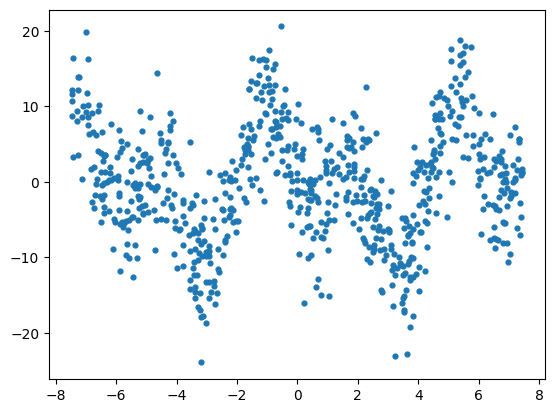

In [2]:
plt.scatter(X, y, 12, marker='o')

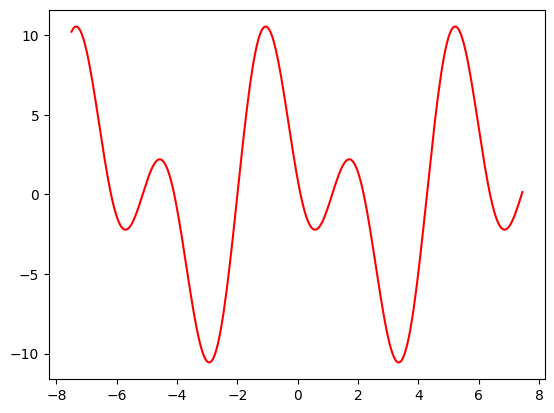

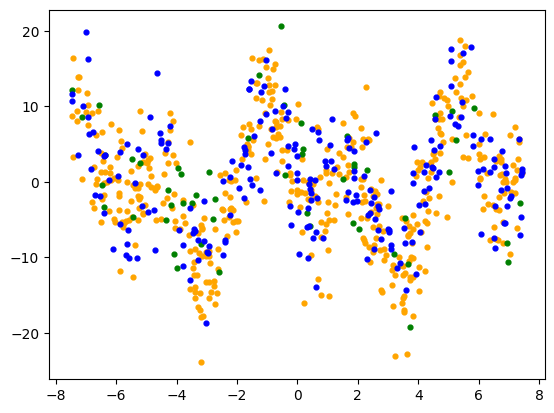

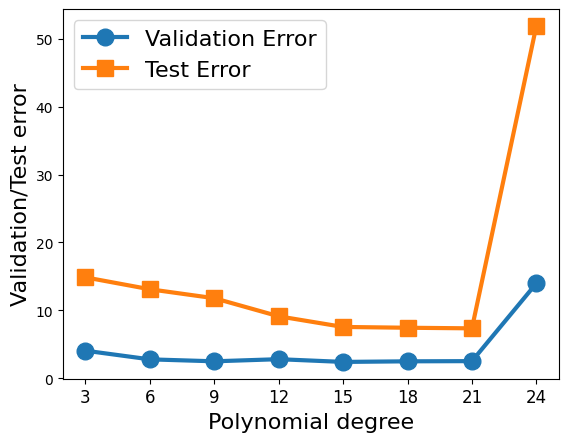

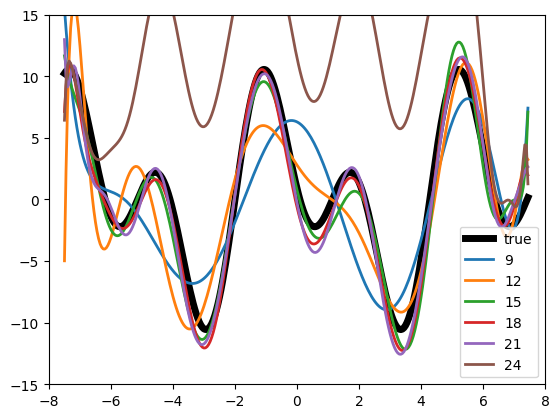

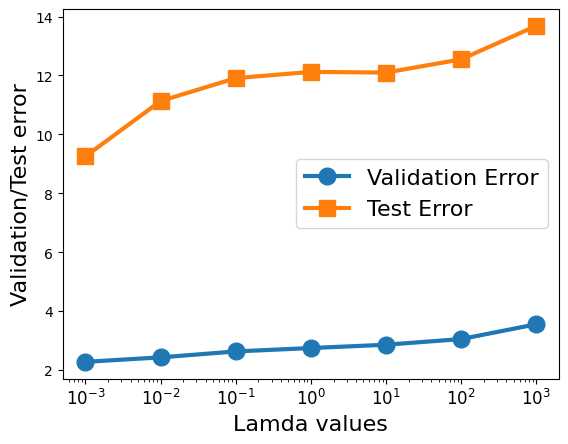

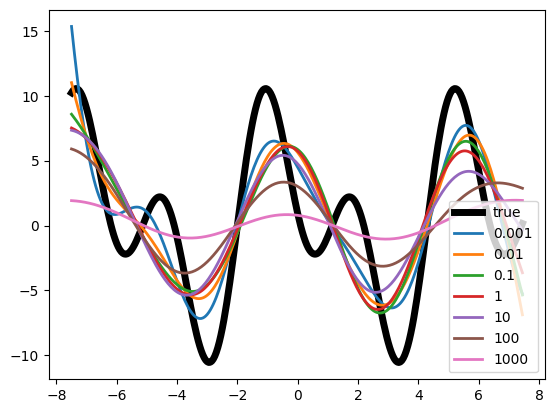

In [3]:
# Plot the true function, which is really "unknown"
x_true = np.arange(-7.5, 7.5, 0.05)
y_true = f_true(x_true)
plt.plot(x_true, y_true, marker='None', color='r')
# scikit-learn has many tools and utilities for model selection
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)

# Plot the three subsets
plt.figure()
plt.scatter(X_trn, y_trn, 12, marker='o', color='orange')
plt.scatter(X_val, y_val, 12, marker='o', color='green')
plt.scatter(X_tst, y_tst, 12, marker='o', color='blue')
# X float(n, ): univariate data
# d int: degree of polynomial
import numpy as np
def polynomial_transform(X, d):
    Phi=[]
    for value in X:
        z=[]
        for d in range(0,d+1):
            z.append(np.power(value,d))
        Phi.append(z)
    Phi=np.asarray(Phi)
    return Phi
polynomial_transform([1,2,3,4,5],3)
# Phi float(n, d): transformed data
# y   float(n,  ): labels
def train_model(Phi, y):
    w=np.linalg.inv(Phi.T@Phi)@Phi.T@y
    return w
train_model(np.array([[3,2,1],[2,3,1]]),np.array([[2],[3]]))
# Phi float(n, d): transformed data
# y   float(n,  ): labels
# w   float(d,  ): linear regression model
def evaluate_model(Phi, y, w):
    y_pred=Phi@w
    err=(y_pred-y)**2
    sum=0
    for value in err:
        sum=sum+value
    mean_sq_err=sum/n
    return mean_sq_err
evaluate_model(np.array([[3,2,1],[2,3,1]]),np.array([[2],[3]]),np.array([[-6.],[4.],[24.]]))


w = {}               # Dictionary to store all the trained models
validationErr = {}   # Validation error of the models
testErr = {}         # Test error of all the models

for d in range(3, 25, 3):  # Iterate over polynomial degree
    Phi_trn = polynomial_transform(X_trn, d)                 # Transform training data into d dimensions
    w[d] = train_model(Phi_trn, y_trn)                       # Learn model on training data

    Phi_val = polynomial_transform(X_val, d)                 # Transform validation data into d dimensions
    validationErr[d] = evaluate_model(Phi_val, y_val, w[d])  # Evaluate model on validation data

    Phi_tst = polynomial_transform(X_tst, d)           # Transform test data into d dimensions
    testErr[d] = evaluate_model(Phi_tst, y_tst, w[d])  # Evaluate model on test data

# Plot all the models
plt.figure()
plt.plot(list(validationErr.keys()), list(validationErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(testErr.keys()), list(testErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('Polynomial degree', fontsize=16)
plt.ylabel('Validation/Test error', fontsize=16)
plt.xticks(list(validationErr.keys()), fontsize=12)
plt.legend(['Validation Error', 'Test Error'], fontsize=16)

plt.figure()
plt.plot(x_true, y_true, marker='None', linewidth=5, color='k')

for d in range(9, 25, 3):
  X_d = polynomial_transform(x_true, d)
  y_d = X_d @ w[d]
  plt.plot(x_true, y_d, marker='None', linewidth=2)

plt.legend(['true'] + list(range(9, 25, 3)))
plt.axis([-8, 8, -15, 15])

# X float(n, ): univariate data
# B float(n, ): basis functions
# gamma float : standard deviation / scaling of radial basis kernel
def radial_basis_transform(X, B, gamma=0.1):
    Phi=[]
    for i in range(len(X)):
        l1=[]
        for j in range(len(B)):
            val=np.exp(-1*gamma*((X[i]-B[j])**2))
            l1.append(val)
        Phi.append(l1)
    return np.array(Phi)
radial_basis_transform(np.array([2,5,2]), np.array([5,2,1]))



# Phi float(n, d): transformed data
# y   float(n,  ): labels
# lam float      : regularization parameter
def train_ridge_model(Phi, y, lam):
    w=np.linalg.inv(Phi.T@Phi+lam*np.identity(Phi[0].size))@Phi.T@y
    return w
train_ridge_model(np.array([[0.40656966, 1. , 0.90483742], [1. , 0.40656966, 0.20189652],[0.40656966, 1. , 0.90483742]]),np.array([1,2,3]),8)



def evaluate_model(Phi, y, w):
    y_pred=Phi@w
    err=(y_pred-y)**2
    sum=0
    for value in err:
        sum=sum+value
    mean_sq_err=sum/n
    return mean_sq_err

w = {}               # Dictionary to store all the trained models
validationErr = {}   # Validation error of the models
testErr = {}         # Test error of all the models

Phi_trn = radial_basis_transform(X_trn, X_trn, gamma=0.1)

lambdarange = [10**x for x in range(-3,4)]
for l in lambdarange:  #varying lamda over the given range

    # Transform training data into d dimensions
    w = train_ridge_model(Phi_trn, y_trn,l)                       # Learn model on training data

    Phi_val = radial_basis_transform(X_val, X_trn, gamma=0.1)       # Transform validation data into d dimensions
    validationErr[l] = evaluate_model(Phi_val, y_val, w)          # Evaluate model on validation data

    Phi_tst = radial_basis_transform(X_tst, X_trn, gamma=0.1)       # Transform test data into d dimensions
    testErr[l] = evaluate_model(Phi_tst, y_tst, w)                # Evaluate model on test data

# Plot all the models
plt.figure()
plt.plot(list(validationErr.keys()), list(validationErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(testErr.keys()), list(testErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('Lamda values',fontsize=16)
plt.ylabel('Validation/Test error',fontsize=16)
plt.xticks(list(validationErr.keys()),fontsize=12)
plt.legend(['Validation Error', 'Test Error'],fontsize=16)
plt.xscale('log')


w = {}
plt.figure()
plt.plot(x_true, y_true, marker='None', linewidth=5, color='k')
lambdarange = [10**x for x in range(-3,4)]
for l in lambdarange:
    Phi_trn = radial_basis_transform(x_true, X_trn, gamma=0.1)
    w = train_ridge_model(Phi_trn, y_true,l)
    y = Phi_trn @ w
    plt.plot(x_true, y, marker='None', linewidth=2)
plt.legend(['true'] + lambdarange)












## <font color = 'dodgerblue'>**Collections**
### <font color = 'dodgerblue'>**Lists**
- Ordered sequences of elements.

### <font color = 'dodgerblue'>**Tuples**
- Immutable ordered sequences.

### <font color = 'dodgerblue'>**Dictionaries**
- Key-value pairs.

### <font color = 'dodgerblue'>**Sets**
- Unordered collections of unique elements.

Let's see some examples:


In [ ]:
# Lists
my_list = [1, 2, 3, "Python"]

# Tuples
my_tuple = (4, 5, 6)

# Dictionaries
my_dict = {"name": "Python", "version": 3.9}

# Sets
my_set = {1, 2, 3, 3}

 # Duplicates are ignored

print("List:", my_list)
print("Tuple:", my_tuple)
print("Dictionary:", my_dict)
print("Set:", my_set)

List: [1, 2, 3, 'Python']
Tuple: (4, 5, 6)
Dictionary: {'name': 'Python', 'version': 3.9}
Set: {1, 2, 3}


In [ ]:
# extract second elements from list
my_list[1]


2

In [ ]:
# extract decpond last element from list
my_list[-1]

'Python'

In [ ]:
# modify second element of list with your name which is a atring
my_list[-2]='Abhishek'
my_list

[1, 2, 'Abhishek', 'Python']

In [ ]:
# modify second element of tuple to 10
print('cannot modfy tuple')

In [ ]:
# extract name from dictionary
print(my_dict['name'])

Python


## <font color = 'dodgerblue'>**Control Flow**
### <font color = 'dodgerblue'>**Comparison Operators**
- `<`, `>`, `==`, `!=`, etc.

### <font color = 'dodgerblue'>**If, Elif, Else Statements**
- Conditional execution of code.

### <font color = 'dodgerblue'>**For Loops**
- Iterating over sequences.

### <font color = 'dodgerblue'>**While Loops**
- Repeating code while a condition is true.

### <font color = 'dodgerblue'>**Range**
- Creating sequences of numbers.

Let's explore:


In [ ]:
# Comparison
x = 10
y = 5
print(x > y)

# If-Elif-Else
if x > y:
    print("x is greater than y")
else:
    print("x is not greater than y")

# For Loop
for i in range(3):
    print(i)

# While Loop
count = 0
while count < 3:
    print(count)
    count += 1


True
x is greater than y
0
1
2
0
1
2


## <font color = 'dodgerblue'>**Advanced Topics**
### List Comprehension
- Concise way to create lists.

### <font color = 'dodgerblue'>**Functions**
- Reusable pieces of code.

### <font color = 'dodgerblue'>**Lambda Expressions**
- Anonymous functions.

### <font color = 'dodgerblue'>**Map and Filter**
- Functional programming concepts.

Examples:


In [ ]:
squares1=[]
for x in range(5):
  squares1.append(x**2)


# List Comprehension
squares2 = [x**2 for x in range(5)]


# Functions
def greet(name):
    return f"Hello, {name}!"

# Lambda Expressions
double = lambda x: x * 2

# Map and Filter
evens = list(filter(lambda x: x % 2 == 0, range(10)))

print("Squares1:", squares1)
print("Squares2:", squares2)
print(greet("Harpreet"))
print("Double 5:", double(5))
print("Evens:", evens)


Squares1: [0, 1, 4, 9, 16]
Squares2: [0, 1, 4, 9, 16]
Hello, Harpreet!
Double 5: 10
Evens: [0, 2, 4, 6, 8]


## <font color = 'dodgerblue'>**Question: Iterate over dictionary**
You are given a dictionary that represents the scores of students in a class. The dictionary keys are the student names, and the values are their respective scores. Write a function find_top_scorer(scores) that takes this dictionary as input and returns the name of the student with the highest score.

<font color = 'dodgerblue'>**Hint: Use key, value in dictionary.items() to iterate over dioctionary**

In [ ]:
scores = {
    "Alice": 90,
    "Bob": 85,
    "Charlie": 92,
    "David": 98
}
def fts(scores):
    top_scorer = None
    top_score = 0

    for x,y in scores.items():
      if y > top_score:
        top_score = y
        top_scorer = x
    return top_score,top_scorer

top_score, top_scorer = fts(scores)
print(f'Top Scorer is {top_scorer} & his marks are {top_score}')

Top Scorer is David & his marks are 98


In [ ]:
print(find_top_scorer(scores))  # Output: "Charlie"

Charlie


## <font color = 'dodgerblue'>**Interactive Exercise: Simple Library Management System** </font>

#### Overview
In this exercise, we will create a basic library management system using Python. The goal is to consolidate your understanding of various Python concepts such as functions, lists, dictionaries, loops, and control structures. The system will allow users to add books and list all the books in the library.

#### Features
1. **Add Book**: Users can add a new book to the library, specifying the title and author. Each book will have an automatically generated unique ID and a status indicating whether it is available.

2. **List Books**: Users can view a list of all the books in the library, including their IDs, titles, authors, and availability status.

#### System Structure
The system will consist of the following components:
- A global list `books` to store the details of each book (list of dictionary of books). Each element in a list is a dictionary. For example,  `[{'id': book_id, 'title': title, 'author': author, 'available': available}]`.
- Functions to handle the features (add book, list books).
- A main menu function to navigate through the options.

#### Step-by-Step Guide
1. **Create the 'add_book' Function**:
   - Parameters: `title` (string), `author` (string), `available` (boolean, default True).
   - Functionality: Generate a unique ID, create a dictionary with the book's details, append it to the `books` list.
   

2. **Create the 'list_books' Function**:
   - Parameters: None.
   - Functionality: Iterate through the `books` list, print the details of each book.
  

3. **Create the 'main_menu' Function**:
   - Parameters: None.
   - Functionality: Continuously display a menu with options to add a book, list books, or exit; take user input to select an option; call the relevant functions based on user input.
   
4. **Initialize the Books List**: Create an empty global list `books` to store the book details.

5. **Test the System**: Call the `main_menu` function to run the system, test adding books, and listing them.

#### Conclusion
This exercise provides an opportunity to apply various Python concepts in a practical context. Through hands-on coding and experimentation, you'll deepen your understanding of Python and its capabilities. Happy coding!


### <font color = 'dodgerblue'>**Step1: Create Function `add_book`**
#### Description
Adds a new book to the library.

#### Parameters
- `title` (string): The title of the book.
- `author` (string): The author of the book.
- `available` (boolean): Whether the book is available or not. Default is True.

#### Functionality
- Generates a unique ID for the new book.
- Creates a dictionary containing the book's details.
- Appends the dictionary to the global `books` list.

#### Example Usage
```python
add_book(title="The Great Gatsby", author="F. Scott Fitzgerald")

In [ ]:
# Function to add a book
def add_book(title, author, available=True):
    book_id = len(books) + 1
    book = {'id':book_id,'Title':title,'Author':author,'Available':available}
    books.append(book)


### <font color = 'dodgerblue'>**Step2: Create Function `list_books`**

#### Description
Lists all the books in the library.

#### Parameters
None

#### Functionality
- Iterates through the global `books` list.
- Prints the details of each book, including ID, title, author, and availability status.

#### Example Usage
```python
list_books()


In [ ]:
# Function to list books
def list_books():
    for book in books:
        print(f"ID: {book['id']}, Title: {book['Title']}, Author: {book['Author']}, Available: {book['Available']}")

### <font color = 'dodgerblue'>**Step3: Create Function `main_menu`**

#### Description
Displays the main menu and handles user input for the library management system.

#### Parameters
None

#### Functionality
- Continuously displays a menu with options to add a book, list books, or exit.
- Takes user input to select an option.
- Calls the relevant functions based on user input.
- Utilizes a while loop to keep the menu running until the user chooses to exit.

#### Example Usage
```python
main_menu()


In [ ]:
# Main menu
def main_menu():
    while True:
        choice = input("1. Add Book, 2. List Books, 3. Exit: ")
        if choice == '1':
            title = input("Enter title: ")
            author = input("Enter author: ")
            add_book(title, author)
        elif choice == '2':
            list_books()
        elif choice == '3':
            break

### <font color = 'dodgerblue'>**Step4: Define a book List**

In [ ]:
# Define the books list
books = []

### <font color = 'dodgerblue'>**Step5: Test the system**

In [ ]:
# Start the program
main_menu()

ID: 1, Title: Game of Thrones, Author: RR Martin, Available: True
